## Objective: 

The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset. Dataset: Use the breast cancer dataset available in the sklearn library.

In [418]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 1. Loading and Preprocessing (2 marks) 

Load the breast cancer dataset from sklearn. Preprocess the data to handle any missing values and perform necessary feature scaling. Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

Loading the data

In [419]:
data = load_breast_cancer()

In [420]:
X = data.data
y = data.target
feature_name = data.feature_names

In [421]:
df = pd.DataFrame(X,columns = feature_name)
df['target'] = y 

In [422]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Checking Statistics

In [424]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [425]:
df.shape

(569, 31)

In [426]:
# handling missing values
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [427]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [428]:
# duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [429]:
df.duplicated().sum()

0

#### No Missing values and duplicates

### Checking and Handling Outliers

<Axes: >

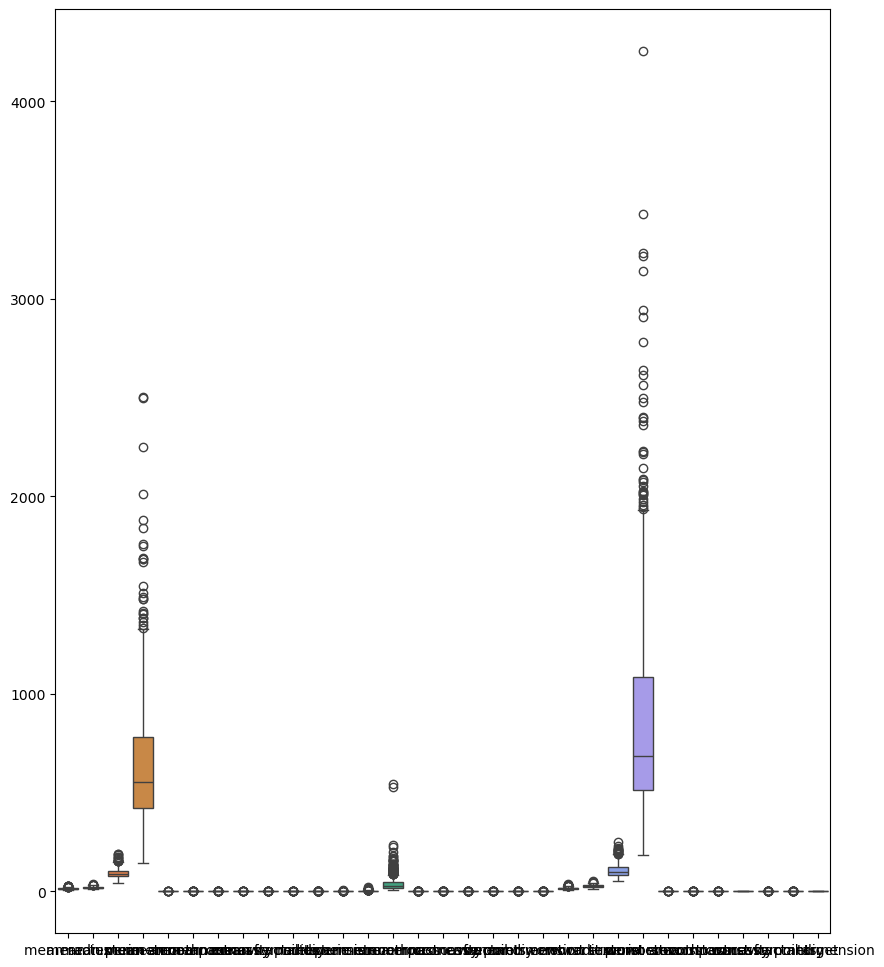

In [430]:
#outliers
plt.figure(figsize = (10,12))
sns.boxplot(df)

<Axes: xlabel='mean radius'>

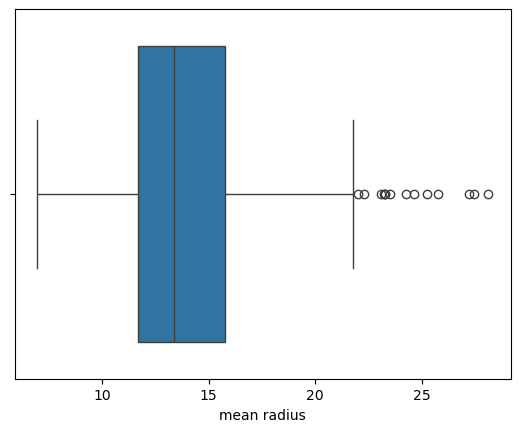

In [431]:
sns.boxplot(x=df['mean radius'])

In [432]:
# collecting numerical cols together
num_columns = df.select_dtypes(include = 'number')

In [433]:
num_columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

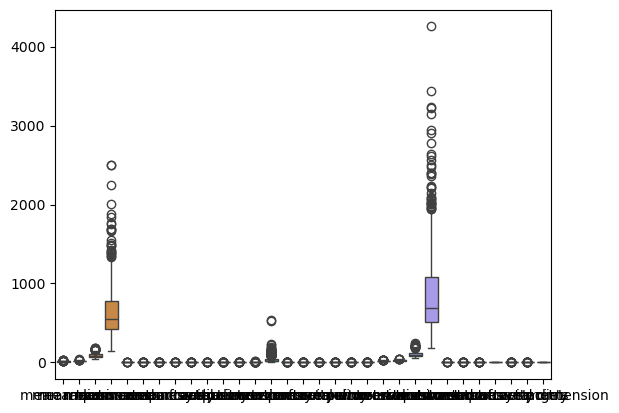

In [434]:
sns.boxplot(data = df)

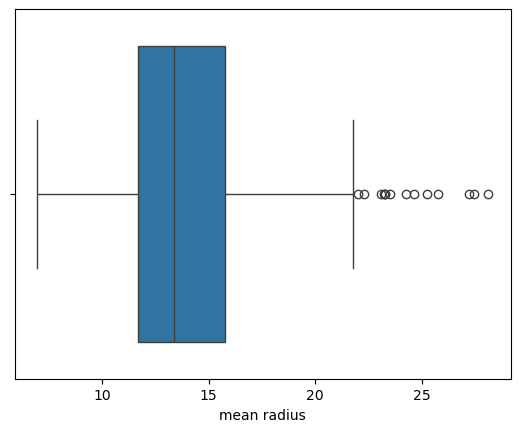

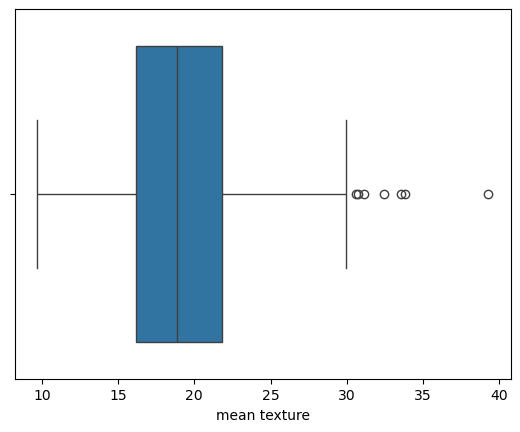

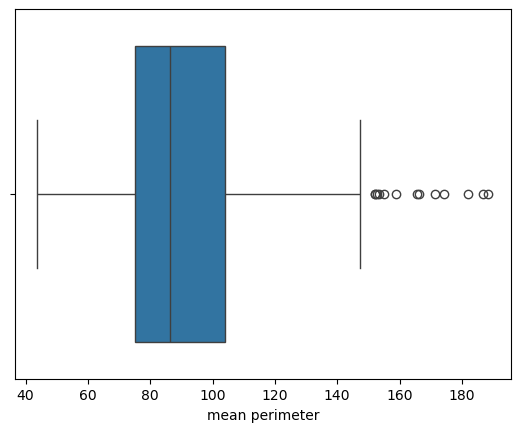

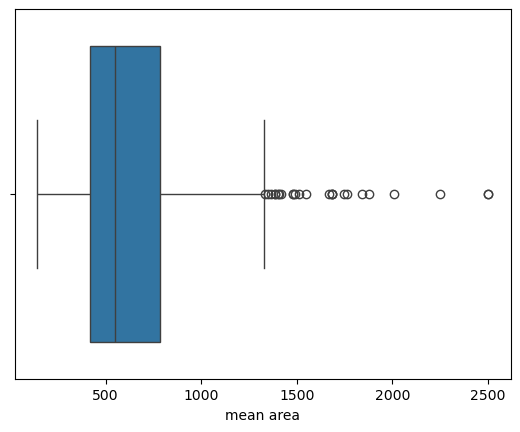

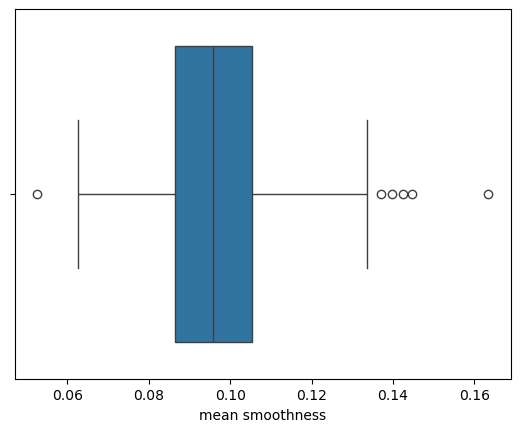

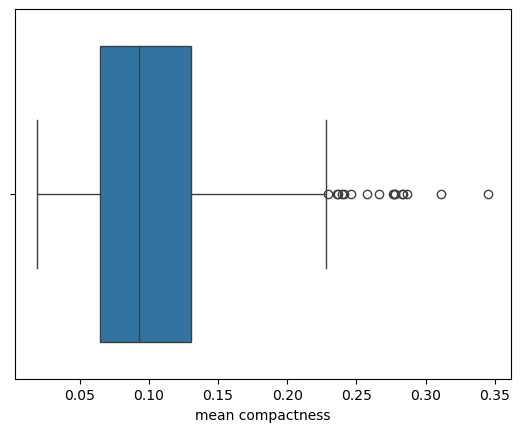

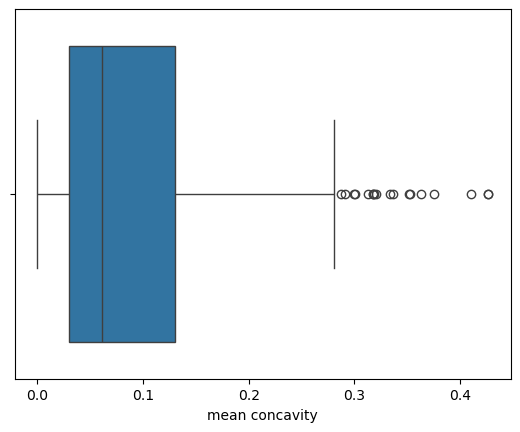

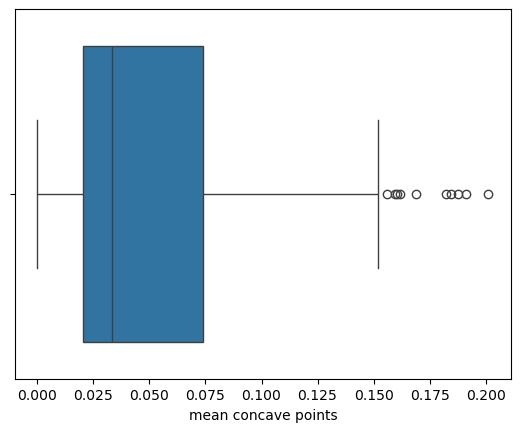

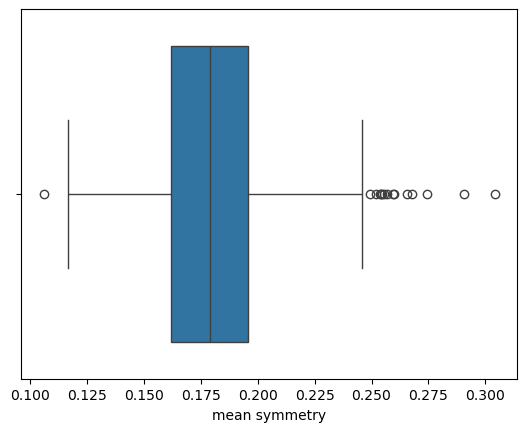

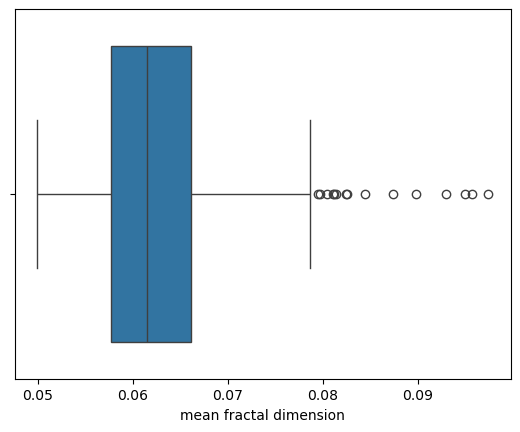

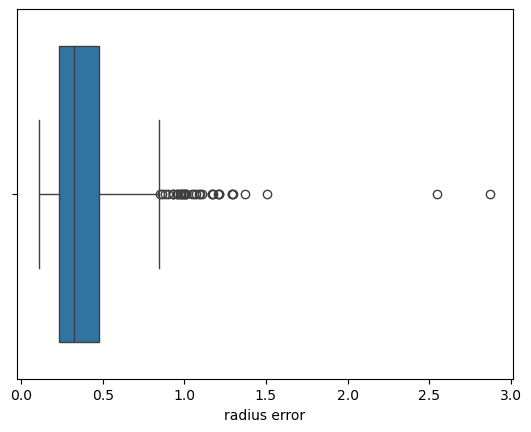

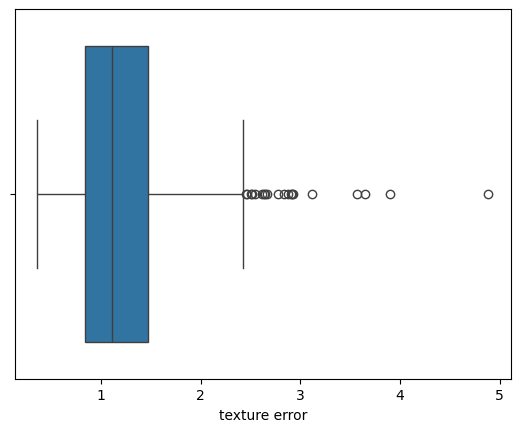

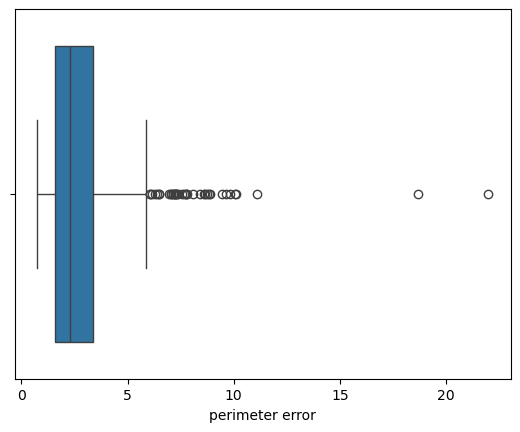

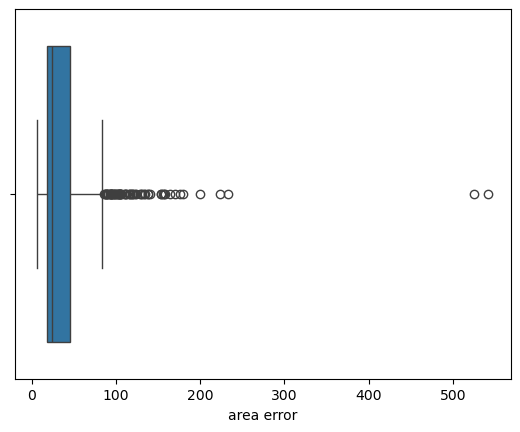

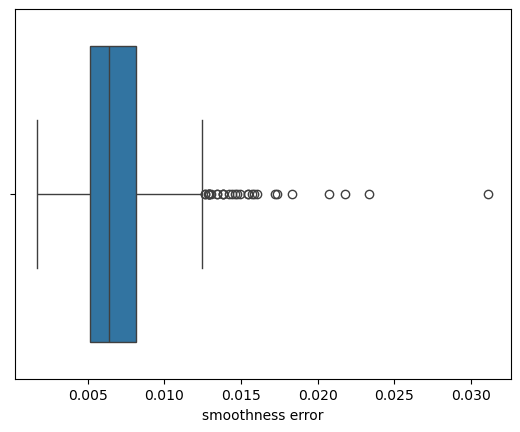

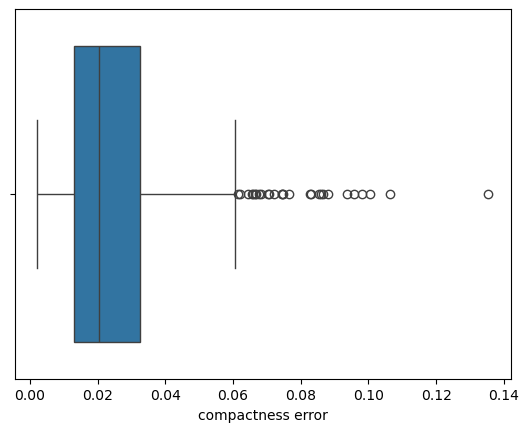

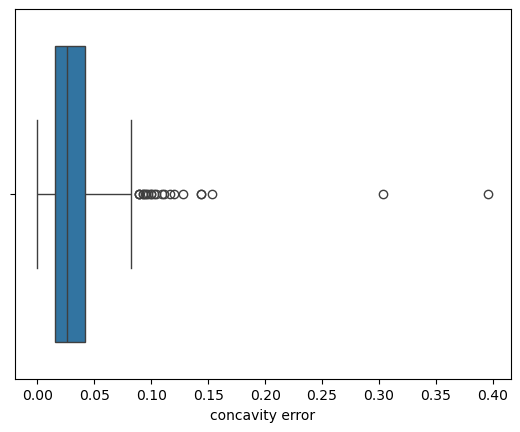

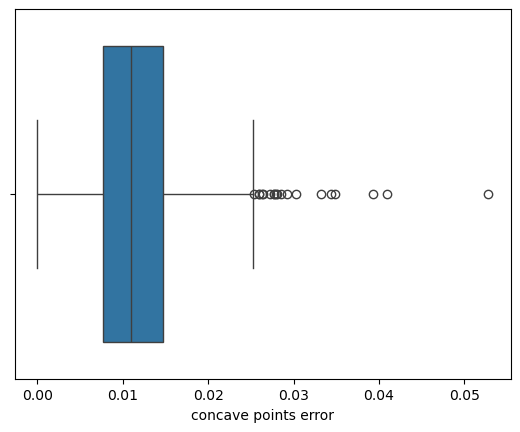

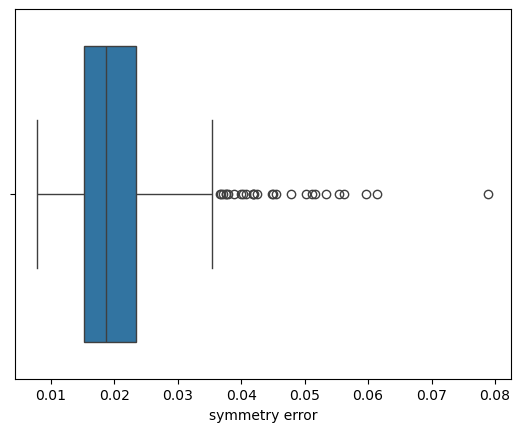

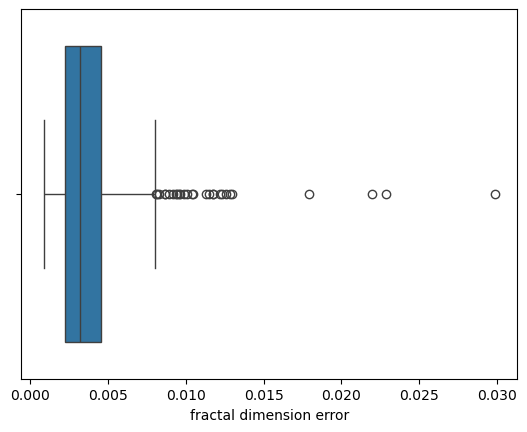

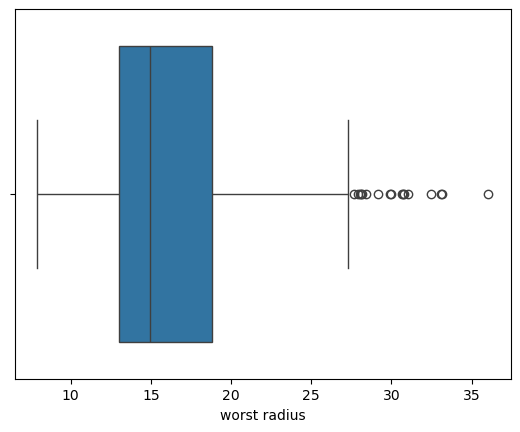

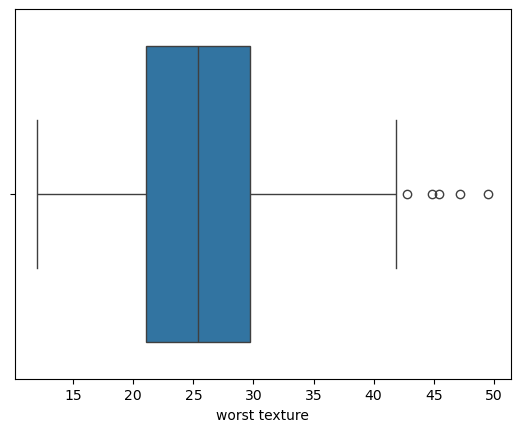

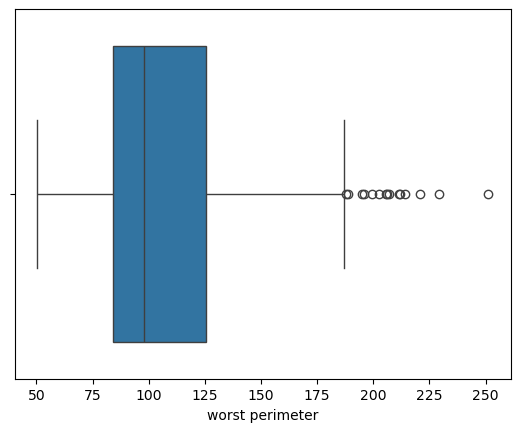

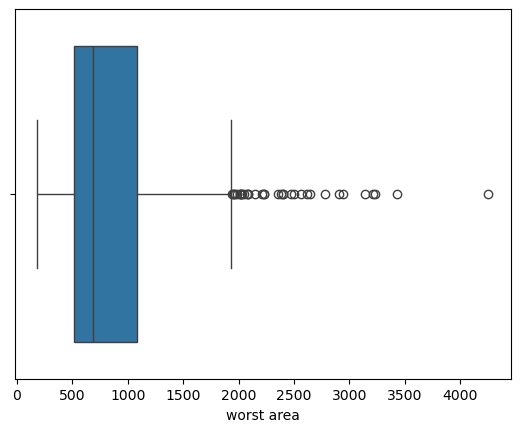

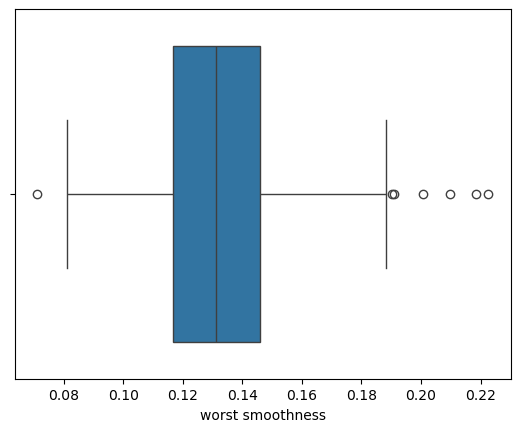

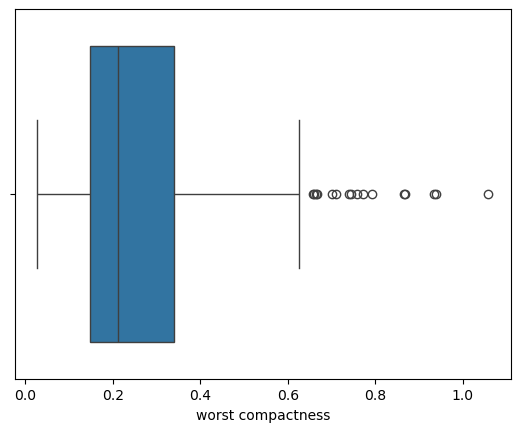

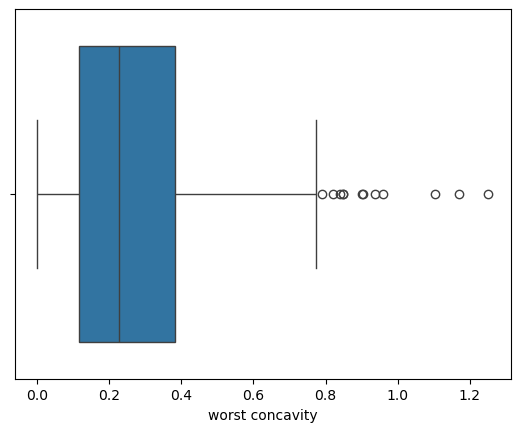

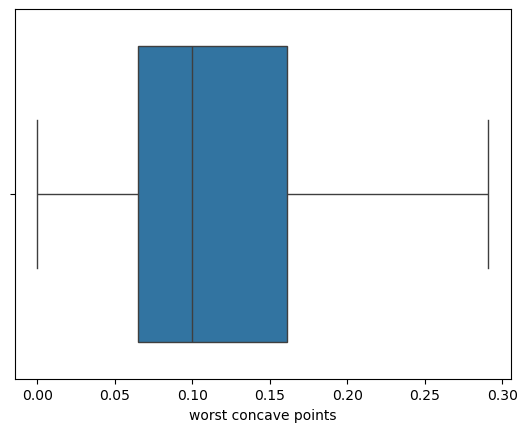

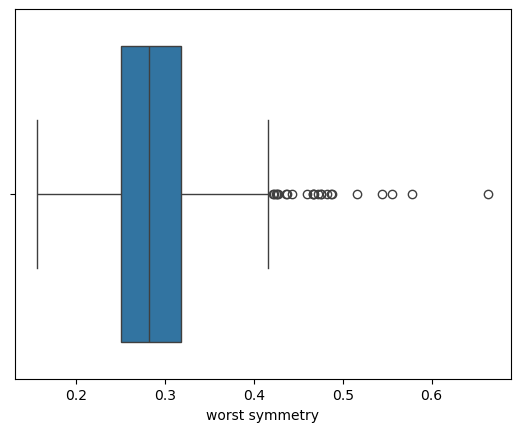

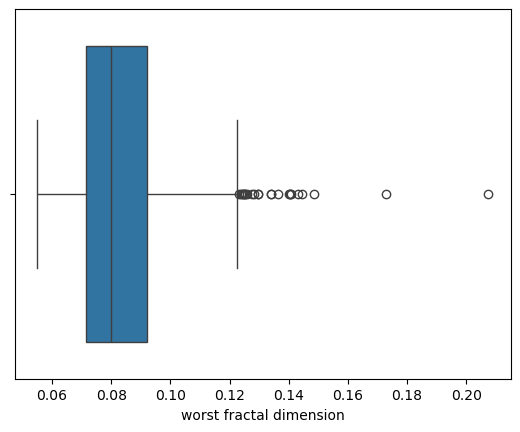

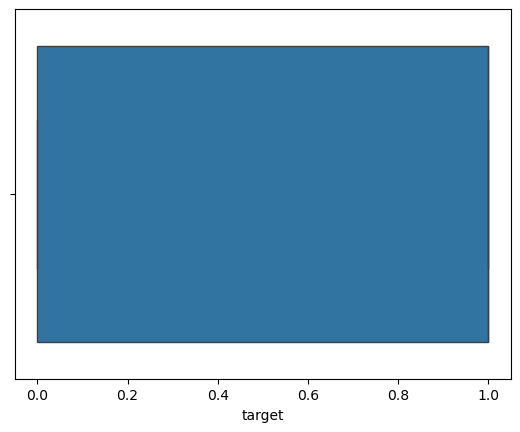

In [435]:
for i in num_columns.columns:
    sns.boxplot(data = df, x = i)
    plt.show()

In [436]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [437]:
df1 = outliers(df)

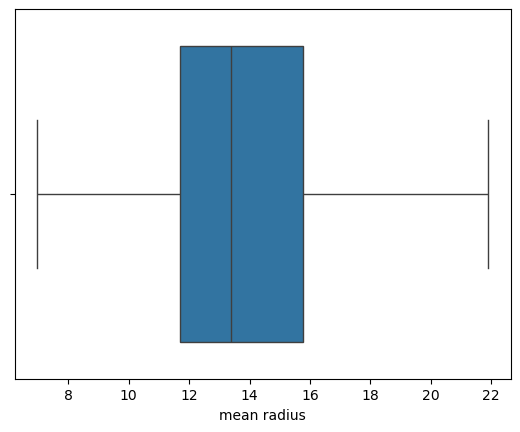

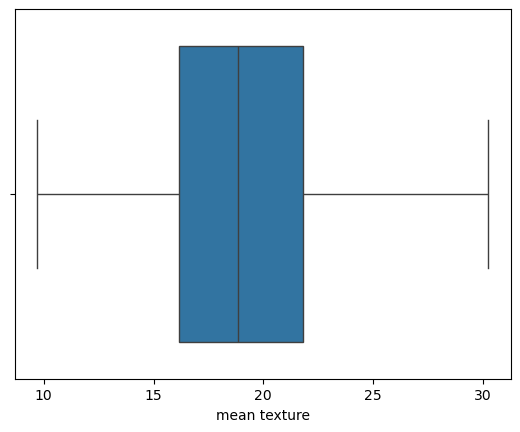

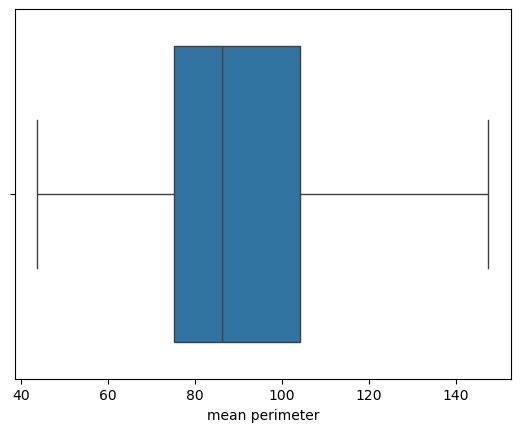

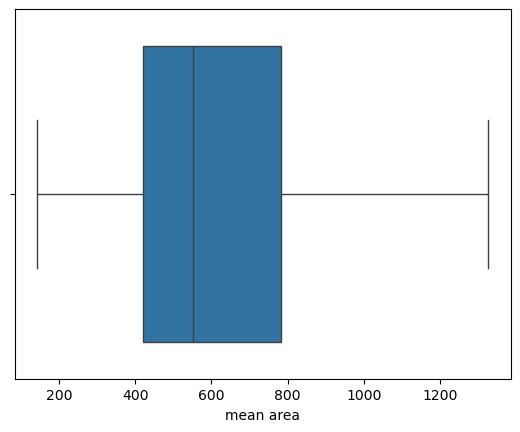

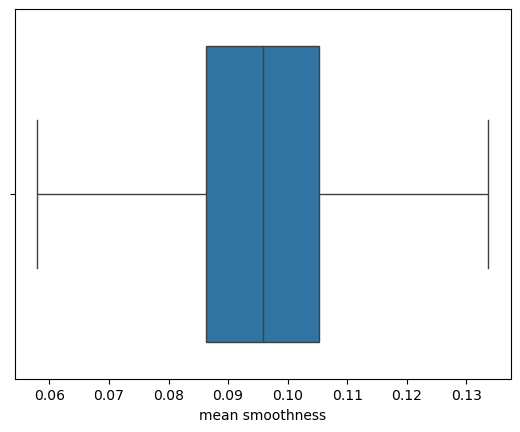

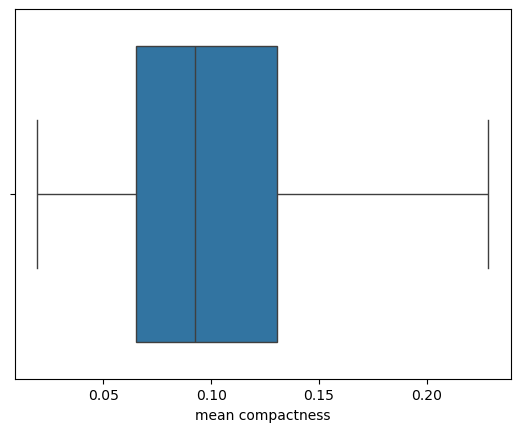

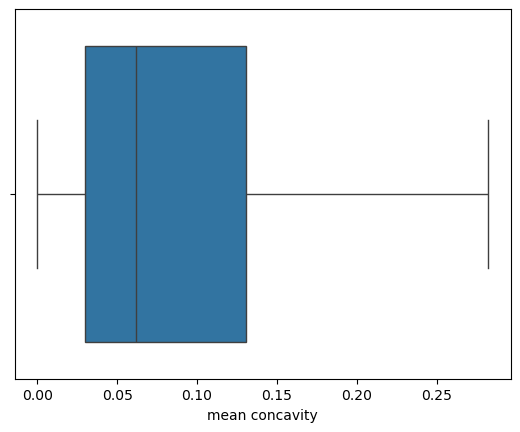

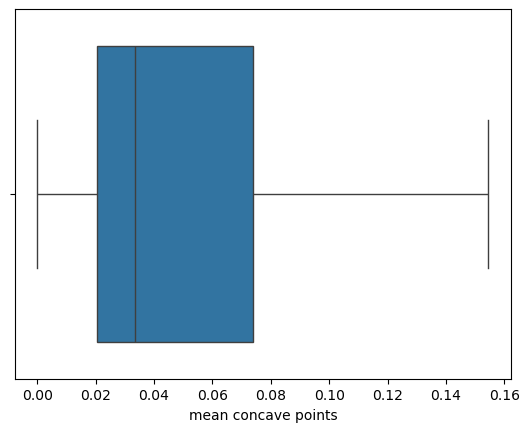

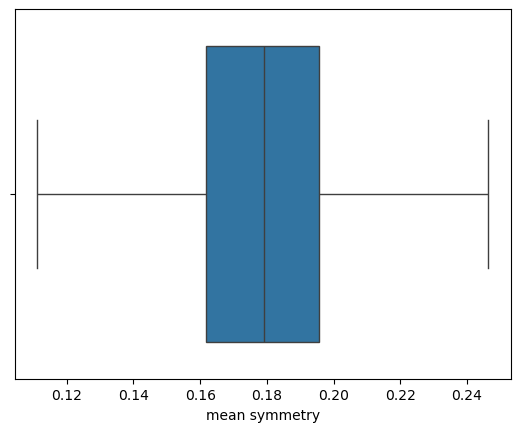

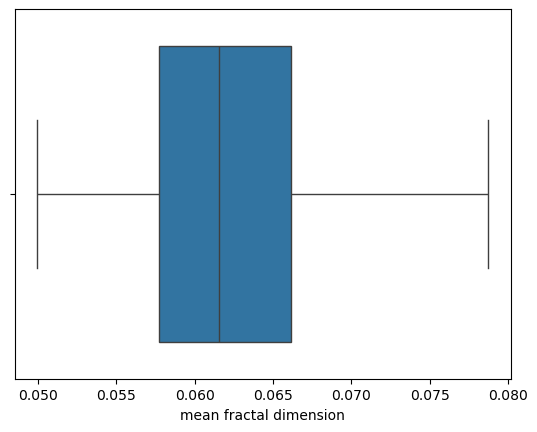

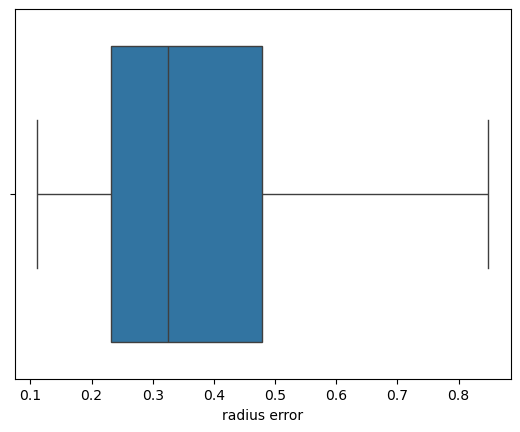

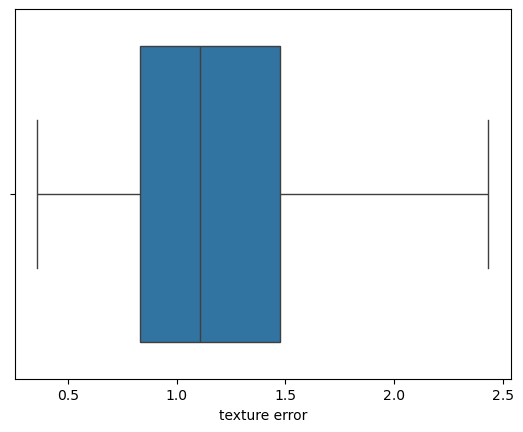

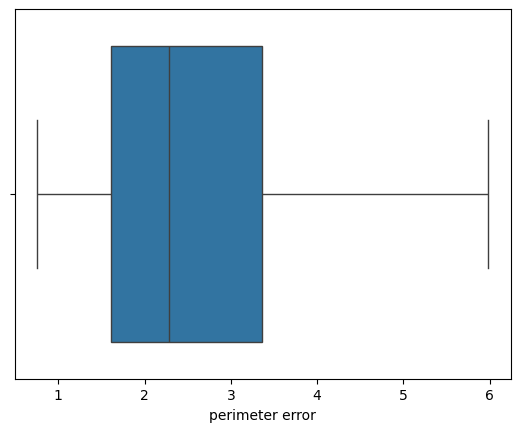

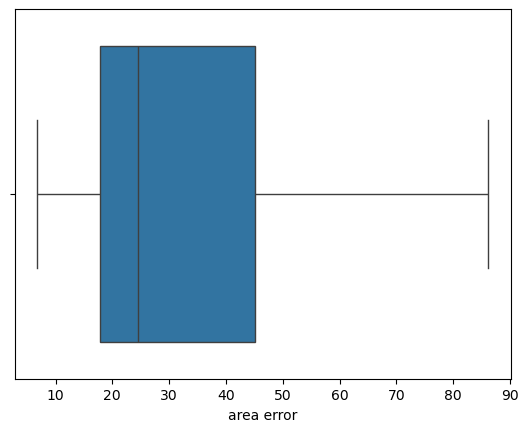

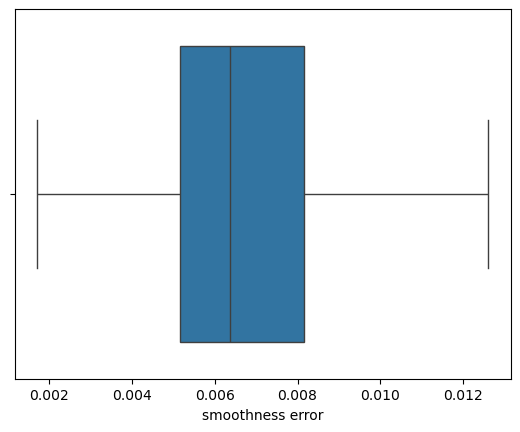

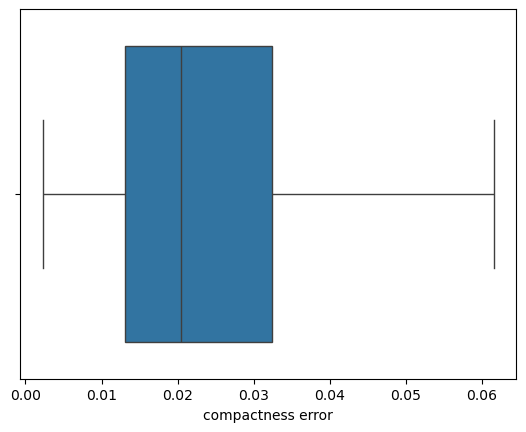

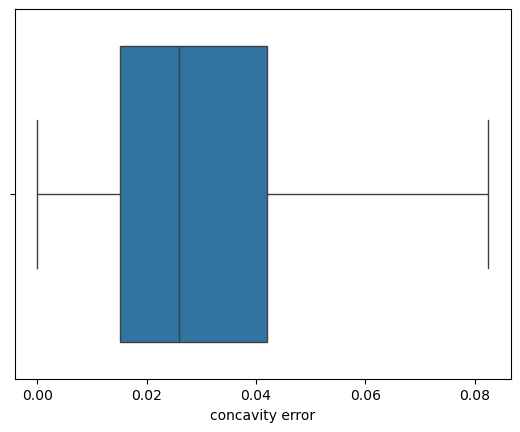

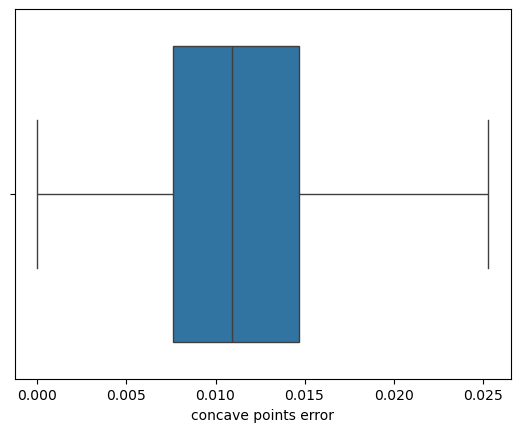

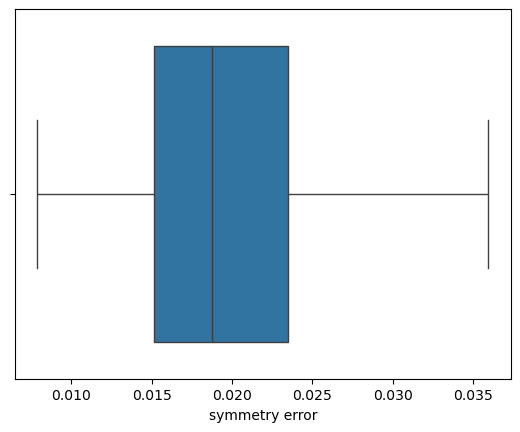

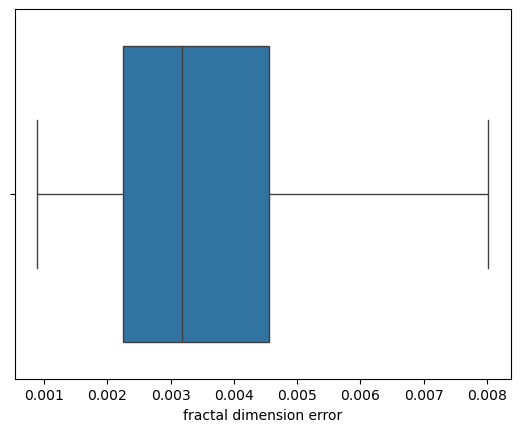

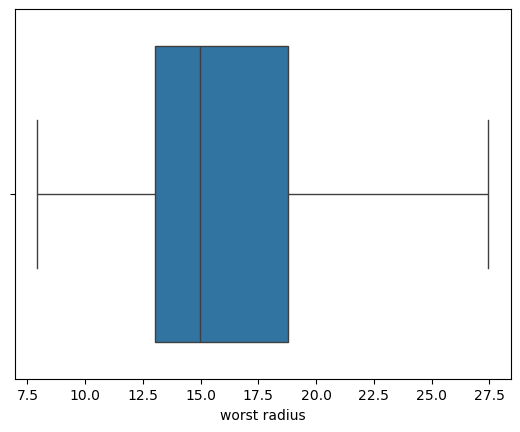

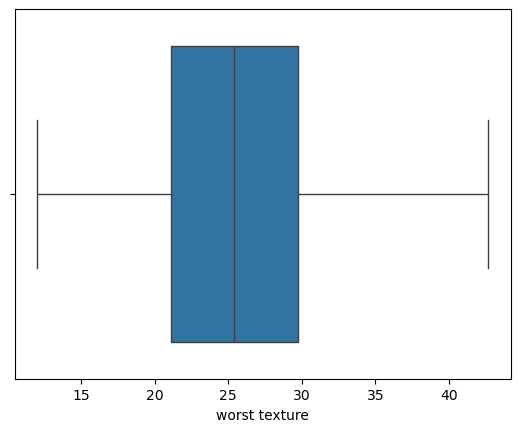

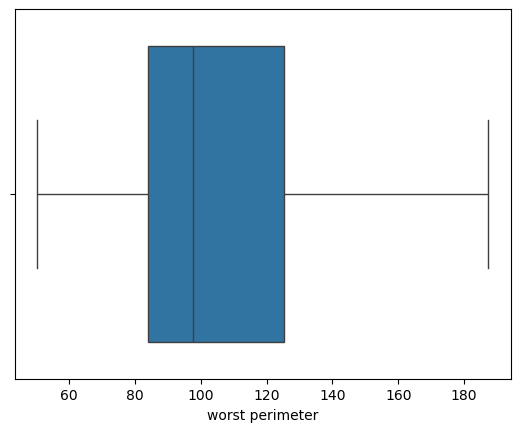

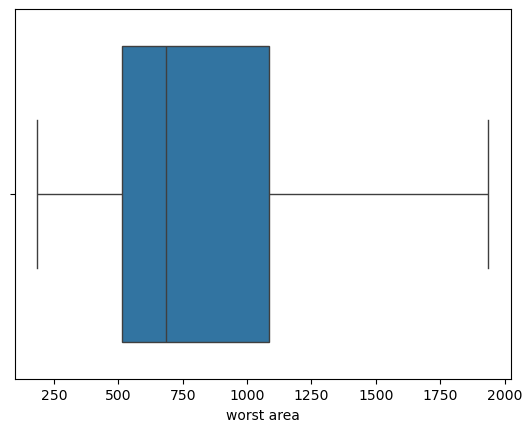

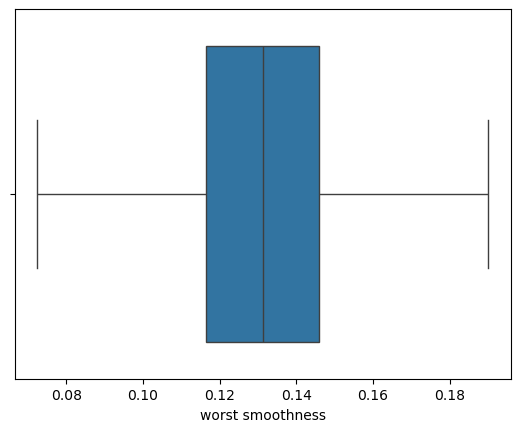

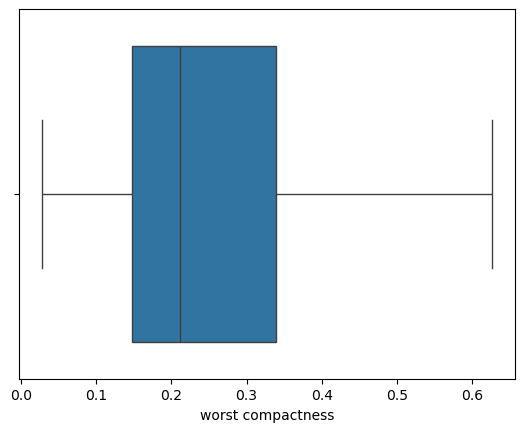

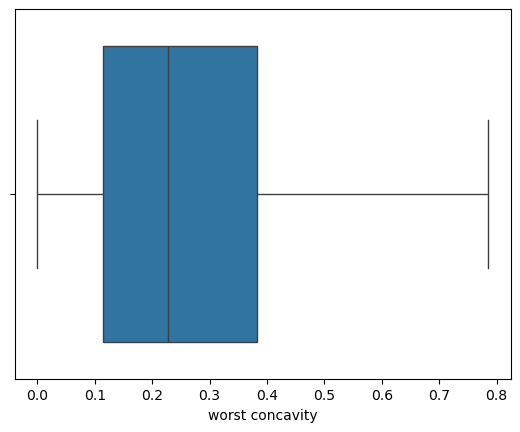

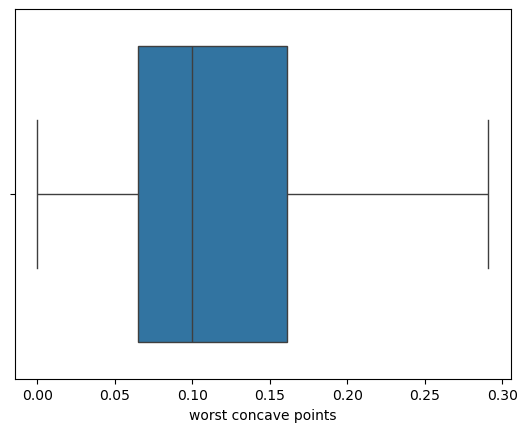

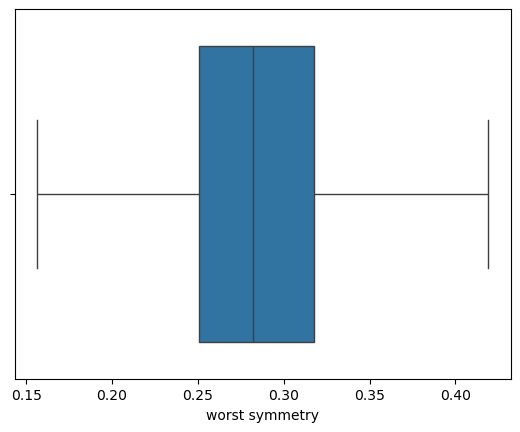

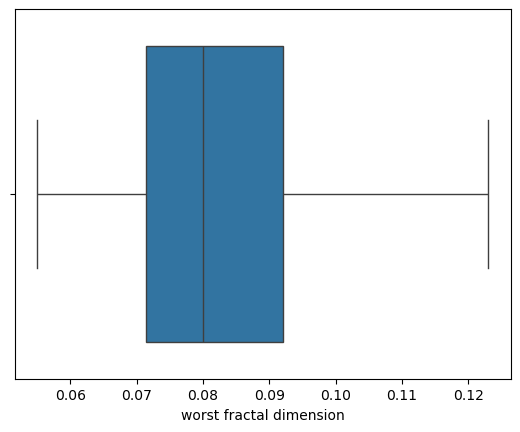

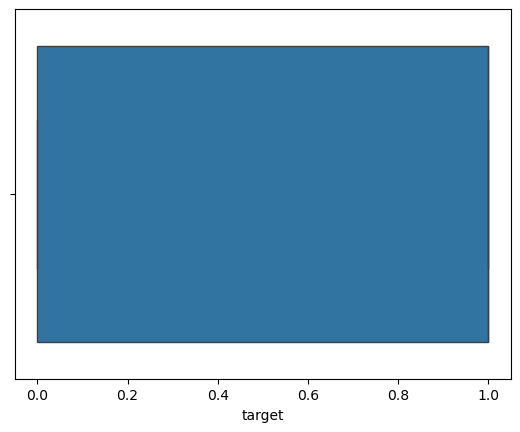

In [438]:
for i in num_columns.columns:
    sns.boxplot(data = df1, x = i)
    plt.show()

### Checking and Handling Skewness

In [439]:
#finding Skew
df1.skew()

mean radius                0.655953
mean texture               0.449700
mean perimeter             0.701081
mean area                  0.922884
mean smoothness            0.257712
mean compactness           0.826755
mean concavity             1.023859
mean concave points        1.004049
mean symmetry              0.403621
mean fractal dimension     0.682430
radius error               1.025031
texture error              0.740987
perimeter error            1.034389
area error                 1.130940
smoothness error           0.780923
compactness error          0.990285
concavity error            0.916740
concave points error       0.539571
symmetry error             0.869297
fractal dimension error    0.979344
worst radius               0.849779
worst texture              0.386858
worst perimeter            0.874870
worst area                 1.048970
worst smoothness           0.247199
worst compactness          0.915295
worst concavity            0.809174
worst concave points       0

In [440]:
# power transformer algorithm to remove skewness, we can also use logarithmic or sqrt method

In [441]:
pt = PowerTransformer(method = 'yeo-johnson')

In [442]:
# check numerical features
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns

In [443]:
numerical_features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [444]:
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

In [445]:
df1[numerical_features]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.172665,-2.612999,1.303242,1.193223,1.557672,1.939324,1.847560,1.868961,2.098277,2.032972,...,1.674752,-1.485029,1.875194,1.722638,1.318152,1.955096,1.788953,1.935654,2.124369,1.825134
1,1.697216,-0.277545,1.592976,1.769690,-0.835257,-0.394789,0.291323,0.823315,0.089075,-0.966260,...,1.630964,-0.297203,1.470361,1.722638,-0.340392,-0.310179,0.061441,1.101594,-0.156175,0.539083
2,1.528511,0.549105,1.512824,1.571529,0.984093,1.190133,1.427109,1.699287,1.019624,-0.312741,...,1.461711,0.064832,1.355625,1.525947,0.580950,1.244939,1.020042,1.722744,1.330307,0.452639
3,-0.772484,0.353712,-0.529022,-0.856072,2.477331,1.939324,1.675749,1.433838,2.223162,2.036229,...,-0.092184,0.223334,-0.047328,-0.456800,2.374851,1.955096,1.729494,1.862378,2.124369,1.944290
4,1.644585,-1.236456,1.652264,1.724810,0.339512,0.769721,1.431056,1.421547,0.077429,-0.530401,...,1.328266,-1.630888,1.349978,1.394803,0.276411,-0.145016,0.824580,0.807077,-0.969692,-0.294213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.875987,0.795218,1.830278,1.770149,1.077644,0.458816,1.687679,1.801711,-0.252485,-1.060202,...,1.682496,0.207188,1.594775,1.722638,0.434098,-0.090704,0.867702,1.503734,-1.690114,-0.763032
565,1.614078,1.914894,1.546273,1.667566,0.159142,0.200511,0.995600,1.329811,-0.147519,-1.258079,...,1.476646,1.875071,1.402021,1.546279,-0.680995,-0.258854,0.478091,0.810995,-0.518237,-1.211576
566,0.847263,1.885314,0.827631,0.872020,-0.850396,0.176519,0.375349,0.396437,-0.826761,-1.006604,...,0.779632,1.342611,0.796270,0.827524,-0.811330,0.629468,0.566221,0.526136,-1.306247,-0.185210
567,1.702799,2.099358,1.782413,1.674013,1.519638,1.939324,1.847560,1.905835,2.036152,1.191113,...,1.714215,2.018297,1.875194,1.626297,1.429467,1.955096,1.950753,1.931990,1.991013,1.944290


In [446]:
df1[numerical_features].skew()

mean radius                0.011115
mean texture              -0.002533
mean perimeter             0.010112
mean area                  0.005457
mean smoothness            0.006193
mean compactness           0.102176
mean concavity             0.210993
mean concave points        0.194157
mean symmetry              0.005121
mean fractal dimension     0.049092
radius error               0.157291
texture error              0.021078
perimeter error            0.070418
area error                 0.056353
smoothness error           0.075000
compactness error          0.170630
concavity error            0.102595
concave points error       0.006558
symmetry error             0.109069
fractal dimension error    0.151253
worst radius               0.034750
worst texture             -0.008927
worst perimeter            0.031901
worst area                 0.024929
worst smoothness           0.005460
worst compactness          0.089849
worst concavity            0.083315
worst concave points       0

In [447]:
df2 = df1[numerical_features]

### finding correleation

In [448]:
correlation = df2.corr()

In [449]:
correlation

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.321373,0.997968,0.999115,0.150890,0.484556,0.652054,0.774812,0.120061,-0.371560,...,0.979838,0.304471,0.974283,0.979266,0.109585,0.472190,0.580737,0.734704,0.171919,0.008051
mean texture,0.321373,1.000000,0.326242,0.324983,-0.010100,0.242076,0.322642,0.288534,0.088221,-0.072064,...,0.345475,0.915678,0.351471,0.347021,0.074394,0.268239,0.308470,0.290785,0.108986,0.099925
mean perimeter,0.997968,0.326242,1.000000,0.996713,0.187436,0.533605,0.690423,0.804306,0.151189,-0.323931,...,0.980834,0.310327,0.979945,0.979793,0.141123,0.516655,0.618416,0.764915,0.195117,0.053900
mean area,0.999115,0.324983,0.996713,1.000000,0.140765,0.476332,0.649699,0.771287,0.114964,-0.379026,...,0.980866,0.308955,0.974781,0.981810,0.104868,0.467337,0.578902,0.730620,0.170006,0.004533
mean smoothness,0.150890,-0.010100,0.187436,0.140765,1.000000,0.682412,0.522411,0.573048,0.549490,0.582149,...,0.201616,0.043930,0.225441,0.190747,0.815548,0.492567,0.437150,0.510229,0.391831,0.507744
mean compactness,0.484556,0.242076,0.533605,0.476332,0.682412,1.000000,0.896043,0.848727,0.557946,0.513909,...,0.526143,0.251278,0.577100,0.516657,0.595169,0.902761,0.840882,0.830233,0.469969,0.697778
mean concavity,0.652054,0.322642,0.690423,0.649699,0.522411,0.896043,1.000000,0.934466,0.452144,0.266175,...,0.683486,0.332691,0.723213,0.679750,0.488336,0.841544,0.933353,0.905807,0.398058,0.542543
mean concave points,0.774812,0.288534,0.804306,0.771287,0.573048,0.848727,0.934466,1.000000,0.438912,0.138027,...,0.799331,0.299565,0.824486,0.794084,0.495510,0.754082,0.826696,0.939414,0.374764,0.414247
mean symmetry,0.120061,0.088221,0.151189,0.114964,0.549490,0.557946,0.452144,0.438912,1.000000,0.437415,...,0.162419,0.106187,0.189066,0.156539,0.434842,0.452321,0.402213,0.407920,0.719068,0.426333
mean fractal dimension,-0.371560,-0.072064,-0.323931,-0.379026,0.582149,0.513909,0.266175,0.138027,0.437415,1.000000,...,-0.318147,-0.046100,-0.270481,-0.325527,0.501857,0.417765,0.263094,0.143573,0.304001,0.777831


Text(0.5, 1.0, 'Heatmap representation of correlation of breast cancer data')

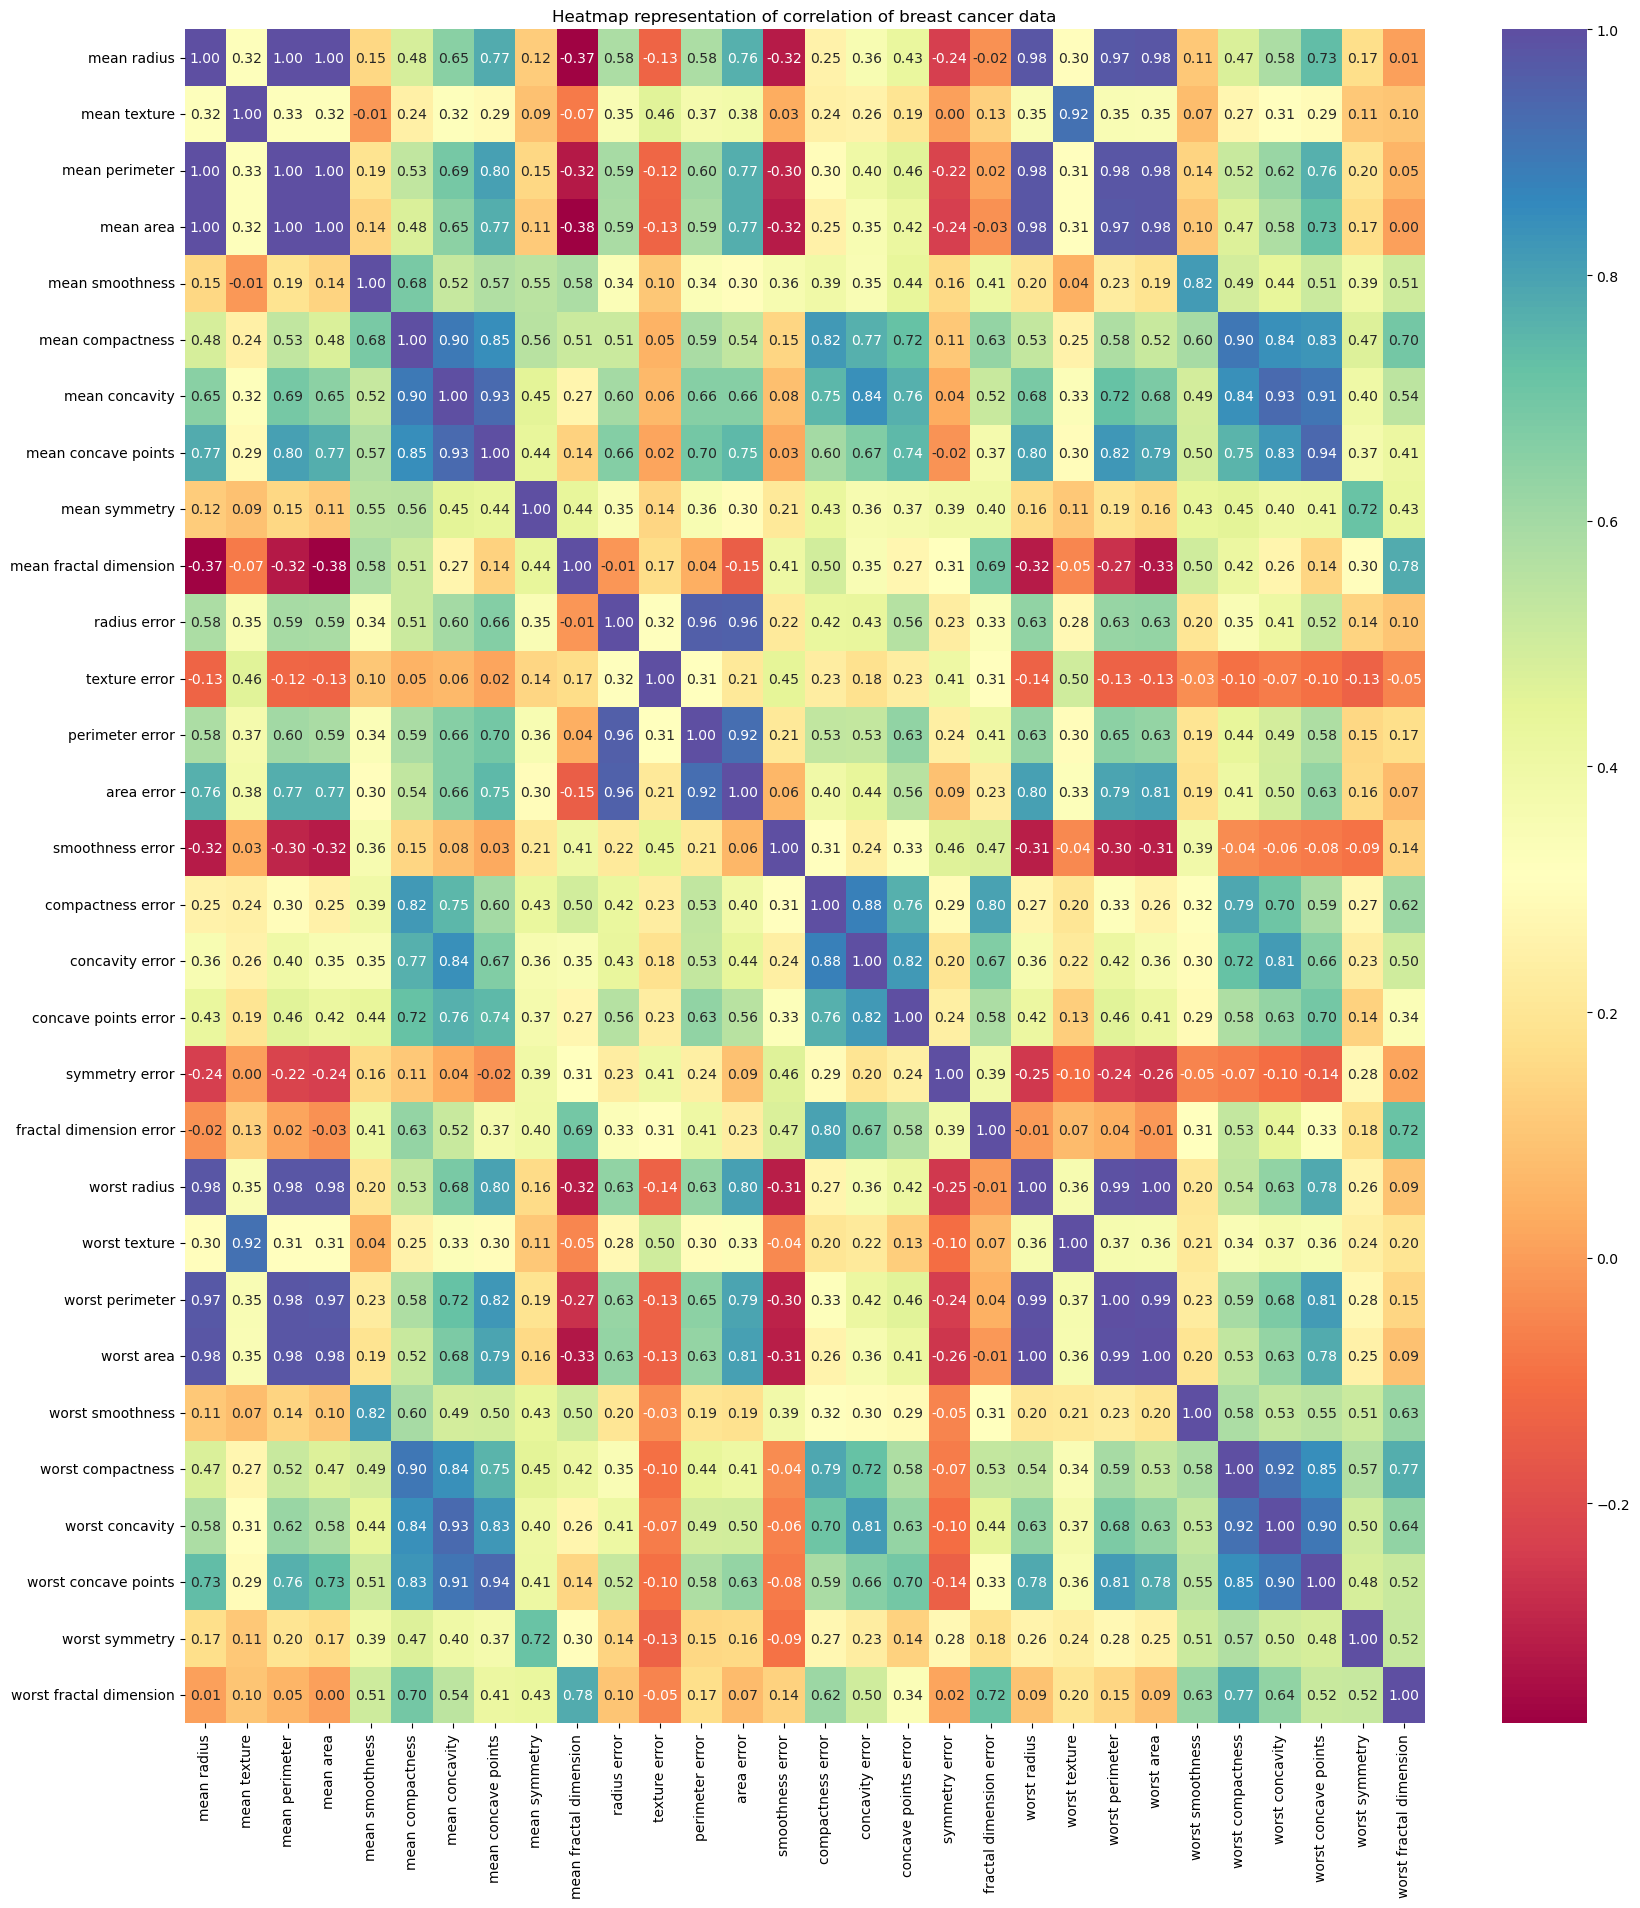

In [677]:
plt.figure(figsize = (20,22))
sns.heatmap(correlation , annot = True , fmt = '.2f',cmap = 'Spectral')
plt.title('Heatmap representation of correlation of breast cancer data')

### feature selection
feature having close relation with target column

In [452]:
from sklearn.feature_selection import SelectKBest,f_classif

In [453]:
X = df2
y = df['target']

In [454]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.172665,-2.612999,1.303242,1.193223,1.557672,1.939324,1.847560,1.868961,2.098277,2.032972,...,1.674752,-1.485029,1.875194,1.722638,1.318152,1.955096,1.788953,1.935654,2.124369,1.825134
1,1.697216,-0.277545,1.592976,1.769690,-0.835257,-0.394789,0.291323,0.823315,0.089075,-0.966260,...,1.630964,-0.297203,1.470361,1.722638,-0.340392,-0.310179,0.061441,1.101594,-0.156175,0.539083
2,1.528511,0.549105,1.512824,1.571529,0.984093,1.190133,1.427109,1.699287,1.019624,-0.312741,...,1.461711,0.064832,1.355625,1.525947,0.580950,1.244939,1.020042,1.722744,1.330307,0.452639
3,-0.772484,0.353712,-0.529022,-0.856072,2.477331,1.939324,1.675749,1.433838,2.223162,2.036229,...,-0.092184,0.223334,-0.047328,-0.456800,2.374851,1.955096,1.729494,1.862378,2.124369,1.944290
4,1.644585,-1.236456,1.652264,1.724810,0.339512,0.769721,1.431056,1.421547,0.077429,-0.530401,...,1.328266,-1.630888,1.349978,1.394803,0.276411,-0.145016,0.824580,0.807077,-0.969692,-0.294213


In [455]:
sk =  SelectKBest(score_func = f_classif, k = 10)
x_new = sk.fit_transform(X,y)
# Get selected feature names and scores
selected_features = X.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

Feature Scores:
                    Feature       Score
7       mean concave points  979.985907
22          worst perimeter  914.408374
23               worst area  886.559410
27     worst concave points  867.101698
20             worst radius  866.414171
6            mean concavity  717.592998
2            mean perimeter  679.260137
3                 mean area  642.004466
13               area error  624.107657
0               mean radius  623.817127
26          worst concavity  525.741746
12          perimeter error  382.985870
10             radius error  374.097181
5          mean compactness  332.050587
25        worst compactness  328.905900
21            worst texture  153.754387
17     concave points error  153.268894
16          concavity erro

In [456]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [457]:
y.unique()

array([0, 1])

### Scaling Train test

In [459]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 1.17266533, -2.61299905,  1.30324223, ...,  1.9356538 ,
         2.12436937,  1.8251342 ],
       [ 1.69721641, -0.27754517,  1.59297636, ...,  1.10159362,
        -0.15617519,  0.53908301],
       [ 1.52851067,  0.54910505,  1.51282389, ...,  1.72274381,
         1.33030701,  0.4526389 ],
       ...,
       [ 0.84726284,  1.88531438,  0.82763099, ...,  0.52613602,
        -1.30624683, -0.18521019],
       [ 1.70279945,  2.09935809,  1.78241263, ...,  1.93198972,
         1.99101258,  1.94429018],
       [-2.62641454,  1.2319994 , -2.74955931, ..., -2.13107031,
         0.0780258 , -0.83108837]])

### Splitting Data

In [460]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)

### 2. Classification Algorithm Implementation (5 marks)

Implement the following five classification algorithms: 1. Logistic Regression 2. Decision Tree Classifier 3. Random Forest Classifier 4. Support Vector Machine (SVM) 5. k-Nearest Neighbors (k-NN) For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset.

## Model 1

### Logistic regression - classification algm

In [462]:
from sklearn.linear_model import LogisticRegression

In [463]:
model1 = LogisticRegression()

In [464]:
# fitting to logistic regression model
model1.fit(x_train,y_train)

LogisticRegression()

In [465]:
# create y predict
y_pred = model1.predict(x_test)

In [466]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [467]:
x_test

array([[-0.37585724, -0.06885702, -0.34092348, ..., -0.08654469,
         0.34309702,  0.44775333],
       [ 1.37669791,  0.56233155,  1.32731696, ...,  1.01520182,
        -0.56239072, -1.25941121],
       [ 0.55264196,  0.14408744,  0.58253644, ...,  0.65906426,
         0.01315697, -0.03828008],
       ...,
       [-0.73274185, -1.0588993 , -0.7403279 , ..., -0.1762796 ,
        -0.3284229 , -0.19352828],
       [ 0.19833399,  1.84505236,  0.20595008, ..., -0.41495424,
        -2.12755213, -0.20338575],
       [ 1.72686929,  2.25117803,  1.66821372, ...,  0.85123714,
         0.07233116,  0.10213212]])

In [468]:
# check matching between predicted and actual value
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [469]:
accuracy1 = accuracy_score(y_test,y_pred)
accuracy1

0.9824561403508771

In [470]:
# accuracy score between 0 and 1
# 0.5 < accuracy score is ok
# 100% accuracy is wrong it cause over fitting

In [471]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[42,  1],
       [ 1, 70]], dtype=int64)

Text(45.722222222222214, 0.5, 'True')

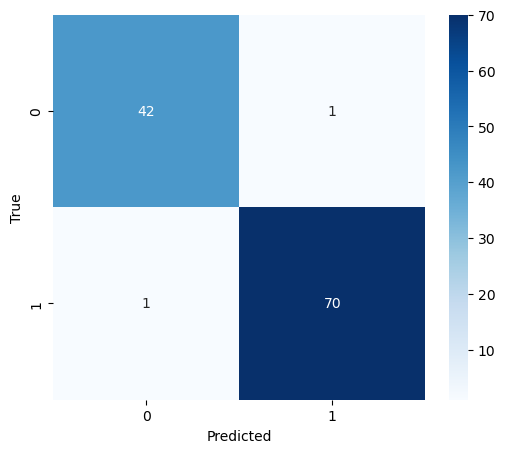

In [472]:
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot = True, cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('True')

In [473]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Model 2
### Decision Tree Classifier

In [475]:
from sklearn.tree import DecisionTreeClassifier

In [476]:
model2 = DecisionTreeClassifier()

In [477]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [478]:
# create y predict
y_dt = model2.predict(x_test)

In [479]:
accuracy2 = accuracy_score(y_test,y_dt)
accuracy2

0.9473684210526315

In [480]:
cm1 = confusion_matrix(y_test,y_dt)
cm1

array([[40,  3],
       [ 3, 68]], dtype=int64)

<Axes: >

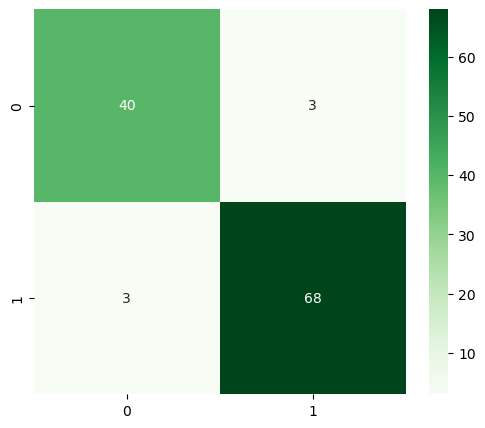

In [481]:
plt.figure(figsize = (6,5))
sns.heatmap(cm1,annot = True, cmap = "Greens")

In [482]:
print (classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Model 3

### Naive Bayes

In [484]:
from sklearn.naive_bayes import GaussianNB

In [485]:
model3 = GaussianNB()

In [486]:
model3.fit(x_train,y_train)

GaussianNB()

In [487]:
# create y predict
y_nb = model3.predict(x_test)

In [488]:
# Evaluation
accuracy3 = accuracy_score(y_test,y_nb)
accuracy3

0.9736842105263158

In [489]:
cm3 = confusion_matrix(y_test,y_nb)
cm3

array([[41,  2],
       [ 1, 70]], dtype=int64)

<Axes: >

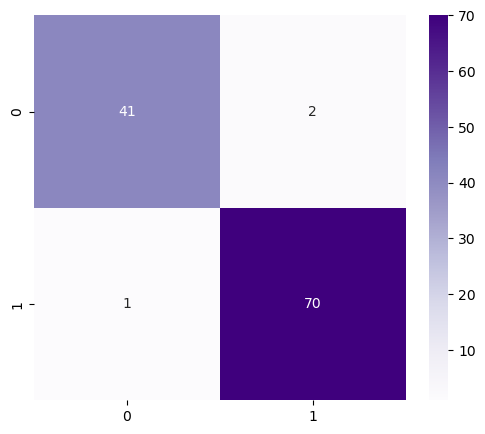

In [490]:
plt.figure(figsize = (6,5))
sns.heatmap(cm3,annot = True, cmap = "Purples")

In [491]:
print (classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Model 4 
### SVM

In [493]:
from sklearn.svm import SVC

In [494]:
model4 = SVC()

In [495]:
model4.fit(x_train,y_train)

SVC()

In [496]:
# create y predict
y_svc = model4.predict(x_test)

In [497]:
# Evaluation
accuracy4 = accuracy_score(y_test,y_svc)
accuracy4

0.9736842105263158

In [498]:
cm4 = confusion_matrix(y_test,y_svc)
cm4

array([[41,  2],
       [ 1, 70]], dtype=int64)

<Axes: >

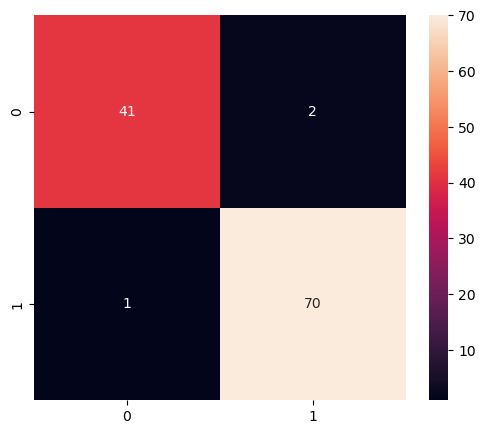

In [499]:
plt.figure(figsize = (6,5))
sns.heatmap(cm3,annot = True)

In [500]:
print (classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [501]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)

In [502]:
print("Accuracy:", accuracy_score(y_test, y_svc))
print("Precision:", precision_score(y_test, y_svc))
print("Recall:", recall_score(y_test, y_svc))
print("F1 Score:", f1_score(y_test, y_svc))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


## Model 5
### KNN

In [504]:
from sklearn.neighbors import KNeighborsClassifier

In [505]:
model5 = KNeighborsClassifier()

In [506]:
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [507]:
y_knn_predict = model5.predict(x_test)

In [508]:
# Evaluation
accuracy5 = accuracy_score(y_test,y_knn_predict)
accuracy5

0.956140350877193

In [509]:
cm5= confusion_matrix(y_test,y_knn_predict)
cm5

array([[41,  2],
       [ 3, 68]], dtype=int64)

<Axes: >

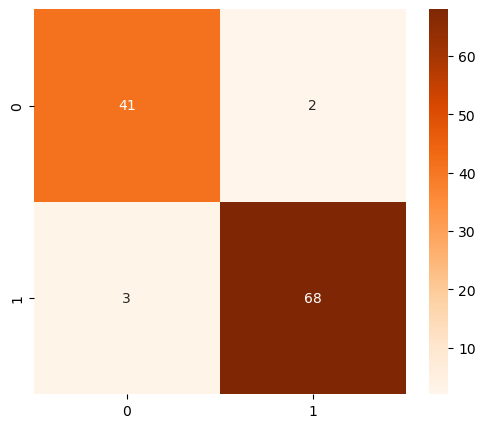

In [510]:
plt.figure(figsize = (6,5))
sns.heatmap(cm5,annot = True, cmap = "Oranges")

In [511]:
print (classification_report(y_test,y_knn_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## ROC curve (Receiver Operating Characteristic curve)

In [513]:
roc = roc_auc_score(y_test,y_svc)

In [514]:
roc

0.969701932525385

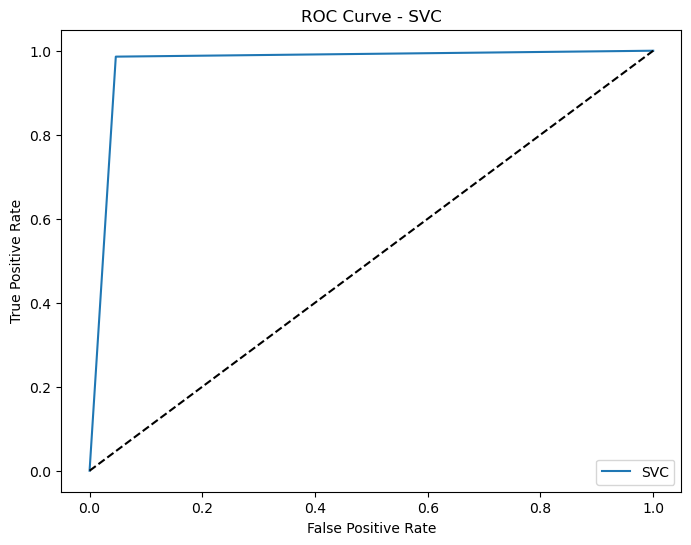

In [515]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_svc)
plt.plot(fpr_lr, tpr_lr, label='SVC') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend()
plt.show()


## Model 6  (Ensemble Learning)

### Random Forest Classifier

In [517]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [518]:
model6 = RandomForestClassifier()

In [519]:
model6.fit(x_train,y_train)

RandomForestClassifier()

In [520]:
rf_pred = model6.predict(x_test)

In [521]:
accuracy6 = accuracy_score(y_test,rf_pred)

In [522]:
accuracy6

0.956140350877193

In [523]:
model_6 = RandomForestClassifier(max_depth = 5,n_estimators = 200)

In [524]:
model_6.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [525]:
rf1_pred = model_6.predict(x_test)

In [526]:
accuracy_6 = accuracy_score(y_test,rf1_pred)

In [527]:
accuracy_6

0.9649122807017544

## Model 7 Boosting

### Gradient Boosting Classifier

In [529]:
model7 = GradientBoostingClassifier()

In [530]:
model7.fit(x_train,y_train)

GradientBoostingClassifier()

In [531]:
gradient_pred = model7.predict(x_test)

In [532]:
accuracy7= accuracy_score(y_test,gradient_pred)

In [533]:
accuracy7

0.956140350877193

In [534]:
model8 = GradientBoostingClassifier(max_depth = 5,n_estimators = 200)

In [535]:
model8.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [536]:
gradient_pred1 = model8.predict(x_test)

In [537]:
accuracy8= accuracy_score(y_test,gradient_pred1)

In [538]:
accuracy8

0.9649122807017544

### 3. Model Comparison (2 marks) 

Compare the performance of the five classification algorithms. Which algorithm performed the best and which one performed the worst?

In [540]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [541]:
results ={}

In [542]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(results[name]['report'])


Training Logistic Regression...
Logistic Regression Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Training SVM...
SVM Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Training Decision Tree...
Decision Tree Accuracy: 0.9298

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43

## Best model

In [544]:
# Find the best model
best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]['accuracy']:.4f}")


Best Model: Logistic Regression
Best Accuracy: 0.9825


## Worst Model

In [686]:
# Find the worst model
worst_model_name = min(results.items(), key=lambda x: x[1]['accuracy'])[0]
worst_model = results[worst_model_name]['model']
print(f"\n Worst Model: {worst_model_name}")
print(f"Worst Accuracy: {results[worst_model_name]['accuracy']:.4f}")


 Worst Model: Decision Tree
Worst Accuracy: 0.9298
